# T-검정
* 검정통게량이 귀무가설 하에 t-분포를 따르는 통계적 가설 검정 방법
* 특정 집단의 평균값을 추정하거나 차이를 검정할 때 사용
* 종속변수는 연속형, 독립변수는 범주형 변수여야함

In [1]:
import scipy.stats as stats # 통계 라이브러리 로드
# alternative = 'two-sided', 'less', 'greater'

### 단일 표본 T-검정(One Sample t-test)
* 단일모집단(전체 데이터에서)에서 관심이 있는 **연속형 변수**의 평균값을 특정 **기준값**과 비교

    귀무가설: 평균값이 기준값과 같다

    대립가설: 평균값이 기준값과 같지않다 / 크다 / 작다 

    * 샤피로 검정 => 데이터의 정규성을 검정
        
    귀무가설: 데이터가 정규성을 따른다
* 정규성을 따르는 경우

    1 sample t-test 진행

    ```stats.ttest_1samp(컬럼, popmean=평균값)```
* 정규성을 따르지 않는 경우
    * 윌코슨의 부호 순위 검정

    일표본/대응표본 T검정에서 정규성 가정이 만족되지 않을 때 사용하는 **비모수 검정법**

    일표본/대응표본 T검정과는 달리 중앙값에 관한 결과를 얻을 수 있음.
    wilcoxon test로 t-test 진행  
    
    ```stats.wilcoxon(컬럼-평균, alternative='양측 / 단측')```

In [2]:
import pandas as pd
cats = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/cats.csv")
cats.head()

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


In [3]:
# 성별, 몸무게, 길이
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     144 non-null    object 
 1   Bwt     144 non-null    float64
 2   Hwt     144 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


In [4]:
import scipy.stats as stats
from scipy.stats import shapiro

mean = 2.6 # 평균 몸무게
shapiro(cats['Bwt']) # 몸무게 데이터의 정규성 검정
# statistic: 검정통게량 p-value: 유의수준

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)

* 귀무가설: 고양이의 평균 몸무게는 2.6kg이다
* 대립가설: 고양이의 평균 몸무게는 2.6kg이 아니다

    p-value가 유의수준보다 작으면 대립가설 채택/귀무가설 기각

In [5]:
stats.wilcoxon(cats['Bwt']-mean, alternative='two-sided') # 양측 검정(더 작거나, 더 크다 / 같지 않다)

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

**고양이의 평균 몸무게는 2.6kg이 아니다**

Text(0, 0.5, 'counts')

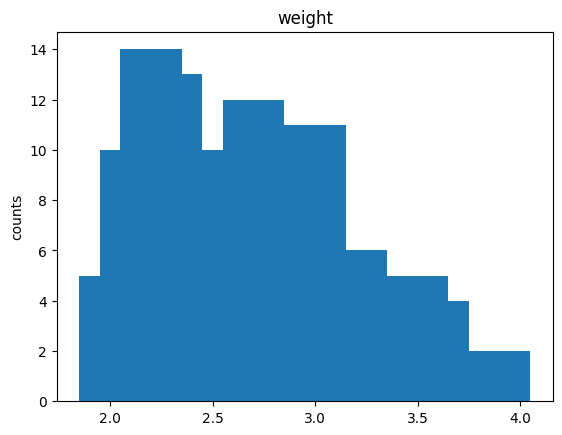

In [6]:
## 몸무게 시각화
import matplotlib.pyplot as plt
plot = cats.Bwt.value_counts() # 해당 몸무게 별 고양이 마리 수
plt.bar(plot.index, plot.values, width=0.3)
plt.title('weight')
plt.ylabel('counts')

### 대응표본 T-검정(Paired Sample t-test)
* 단일모집단에 대해 어떤 처리를 가했을 때 처리 전후에 따른 평균의 차이를 비교할 때 사용한다
* 같은 집단을 두 번 측정하므로 등분산성 만족
* 정규성 검정 필요

    ```stats.ttest_rel(전집단, 후집단, 검정방식(alternative))```

    귀무가설: 두 모집단의 평균값에 차이가 없다

    대립가설: 두 모집단의 평균값에 차이가 있다

In [7]:
# 예제: 수면제 복용 전후의 수면시간
import pandas as pd
data = {'before':[7,3,4,5,2,1,6,6,5,4],
        'after':[8,4,5,6,2,3,6,8,6,5]}
data = pd.DataFrame(data)

In [8]:
# 전후집단 정규성 검정 = OO
shapiro(data['after'])

ShapiroResult(statistic=0.9456835985183716, pvalue=0.6177982091903687)

In [9]:
stats.ttest_rel(data['after'], data['before'], alternative='greater')

TtestResult(statistic=4.743416490252569, pvalue=0.0005269356285082764, df=9)

* 수면제는 수면시간에 양의 영향을 끼친다고 볼 수 있음

### 독립표본 T-검정(Independent Sample t-test)
* 두 개의 독립된 모집단의 평균을 비교할 때 사용
* 모집단, 모수, 표본이 모두 두 개씩 존재 (정규성, 등분산성 가정 필요)

    ```stats.ttest_ind(집단1, 집단2 equal_var=등분산성 만족 여부(T/F)```

    귀무가설: 두 모평균 사이의 차이가 없다
    
    대립가설: 두 모평균 사이의 차이가 있다

In [3]:
# 두집단으로 나누기(by 성별)
f = cats.loc[cats['Sex'] == 'F', 'Bwt'] # 성별이 여자인 고양이의 몸무게
m = cats.loc[cats['Sex'] == 'M', 'Bwt']
stats.levene(f,m)
# 검정 통계량, p-value

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

* 두 데이터가 등분산성을 만족한다는 귀무가설 기각

In [4]:
# ttest_ind함수의 equal_var 파라미터를 False로 설정하여 검정 시행
stats.ttest_ind(f, m, equal_var=False)

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

In [22]:
result = stats.ttest_ind(f, m, equal_var=False)
result.statistic

-8.70948849909559

* 두 집단의 몸무게가 같다는 귀무가설 기각

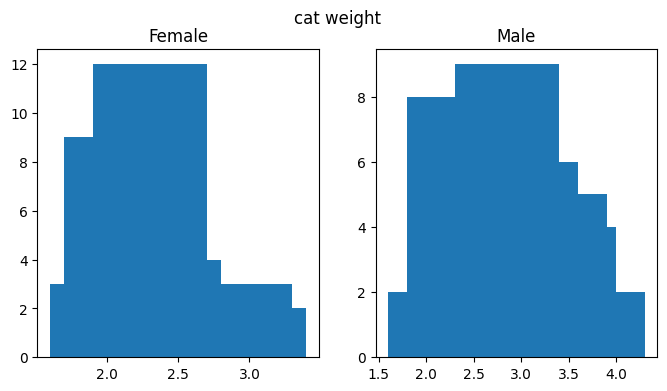

In [21]:
# 시각화
import matplotlib.pyplot as plt

ff = f.value_counts(sort=False)
mm = m.value_counts(sort=False)

plt.figure(figsize=(8, 4)) # 전체 그래프 사이즈
plt.suptitle('cat weight') # 전체 제목
plt.subplot(1,2,1) # (가로, 세로, 몇번째 그래프)
plt.bar(ff.index, ff.values) #(x, y)
plt.title('Female')# 그래프 제목
plt.subplot(1,2,2)
plt.bar(mm.index, mm.values)
plt.title('Male')
plt.show();